#Liberando Drive


In [1]:
#liberando Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


#Pacotes

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#Importando Dataset

In [3]:
path_dataset = '/content/drive/My Drive/UFPR/aplicacao_ciencia_dados/trabalho_disciplina/dataset/training_dataset.csv'
data = pd.read_csv(path_dataset)

#Análise Geral

In [4]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
print("O número de colunas é {}".format(len(data.columns)))

O número de colunas é 31


In [6]:
for columns in data.columns:
  print(columns)

having_IP_Address
URL_Length
Shortining_Service
having_At_Symbol
double_slash_redirecting
Prefix_Suffix
having_Sub_Domain
SSLfinal_State
Domain_registeration_length
Favicon
port
HTTPS_token
Request_URL
URL_of_Anchor
Links_in_tags
SFH
Submitting_to_email
Abnormal_URL
Redirect
on_mouseover
RightClick
popUpWidnow
Iframe
age_of_domain
DNSRecord
web_traffic
Page_Rank
Google_Index
Links_pointing_to_page
Statistical_report
Result


O dataset possui 31 colunas. Sendo que 30 são característica e a última é a classe (Result) <br>
As características do dataset, são heurísticas para indentificação de phishing websites.  

In [7]:
data['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [8]:
count = data['Result'].value_counts()

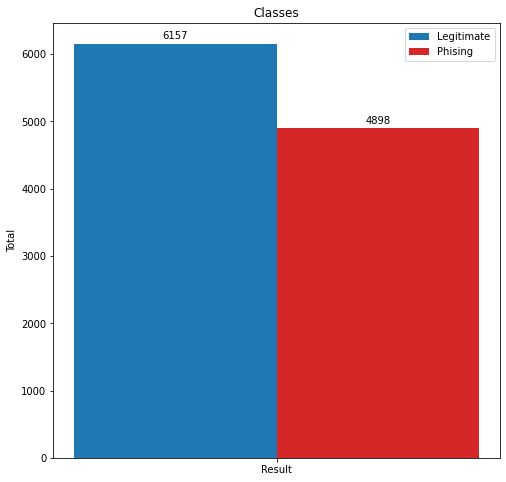

In [9]:
labels = ['Result']
legitimate = count[1]
phishing = count[-1]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, legitimate, width, label='Legitimate', color='tab:blue')
rects2 = ax.bar(x + width/2, phishing, width, label='Phising', color='tab:red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total')
ax.set_title('Classes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.set_size_inches(8,8)

plt.show()

#Análise Coluna  1  - having_IP_Address

If an IP address is used as an alternative of the domain name in the URL, such as “http://125.98.3.123/fake.html”, users can be sure that someone is trying to steal their personal information. Sometimes, the IP address is even transformed into hexadecimal code as shown in the following link “http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html”. <br>
Rule: <br>
- The Domain Part has an IP Address → Phishing (-1)
- Otherwise→ Legitimate (1)

In [10]:
count_having_IP_Address =data['having_IP_Address'].value_counts()

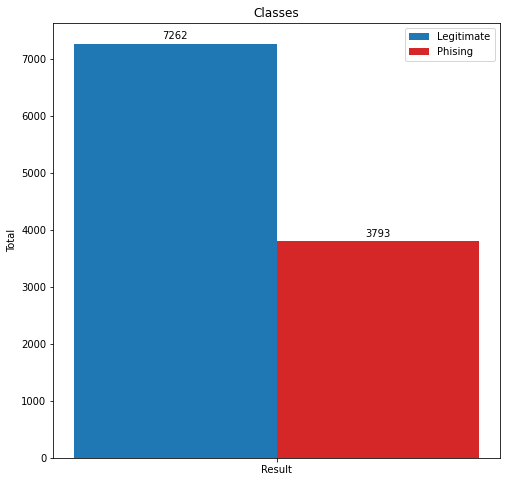

In [11]:
labels = ['Result']
legitimate = count_having_IP_Address[1]
phishing = count_having_IP_Address[-1]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, legitimate, width, label='Legitimate', color='tab:blue')
rects2 = ax.bar(x + width/2, phishing, width, label='Phising', color='tab:red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total')
ax.set_title('Classes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.set_size_inches(8,8)

plt.show()

Comprando com os resultados corretos

In [15]:
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

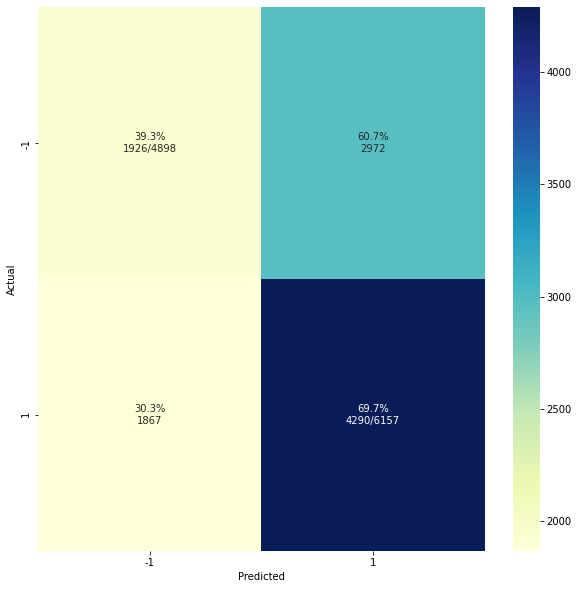

In [16]:
plot_cm(data['Result'], data['having_IP_Address'])

In [17]:
print(accuracy_score(data['Result'],data['having_IP_Address']))

0.5622795115332428


In [18]:
print(f1_score(data['Result'],data['having_IP_Address'],average='binary'))

0.6393919069975408


In [19]:
print(matthews_corrcoef(data['Result'],data['having_IP_Address']))

0.09416009495620382


# Análise Coluna 2 - URL_Length

Phishers can use long URL to hide the doubtful part in the address bar. For example: <br>
http://federmacedoadv.com.br/3f/aze/ab51e2e319e51502f416dbe46b773a5e/?cmd=_home&amp;dispatch=11004d58f5b74f8dc1e7c2e8dd4105e811004d58f5b74f8dc1e7c2e8dd4105e8@phishing.website.html <br>
To ensure accuracy of our study, we calculated the length of URLs in the dataset and produced an average URL length. The results showed that if the length of the URL is greater than or equal 54 characters then the URL classified as phishing. By reviewing our dataset we were able to find 1220 URLs lengths equals to 54 or more which constitute 48.8% of the total dataset size.
Rule:
- URL length < 54 → Legitimate (1)
- URL length ≥ 54 and ≤ 75 → Suspicious (0)
- otherwise → Phishing (-1)

In [20]:
count_URL_Length=data['URL_Length'].value_counts()

In [48]:
def plot_3(count):
  labels = ['Resultados']
  legitimate = count[1]
  suspicious = count[0]
  phishing = count[-1]

  x = np.arange(len(labels))  # the label locations
  width = 0.3  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - 0.3, legitimate, width, label='Legitimate', color='tab:blue')
  rects2 = ax.bar(0, suspicious, width, label='Suspicious', color='tab:orange')
  rects3 = ax.bar(x + 0.3, phishing, width, label='Phising', color='tab:red')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Total')
  ax.set_title('Classes')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)

  fig.set_size_inches(8,8)

  plt.show()

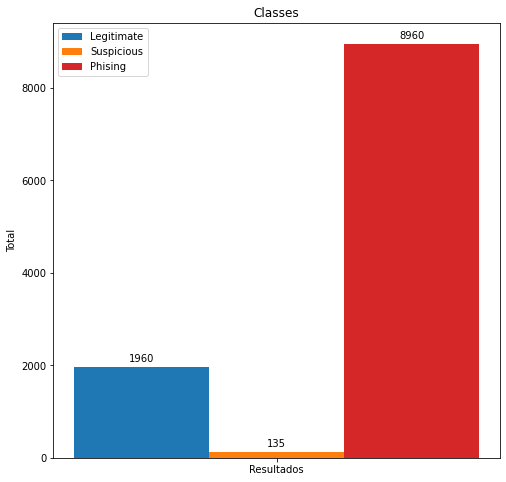

In [49]:
plot_3(count_URL_Length)

Para acurácia não será análise os 135 que não a decisão da categoria

In [22]:
data_url_clean =data.query('URL_Length != 0')

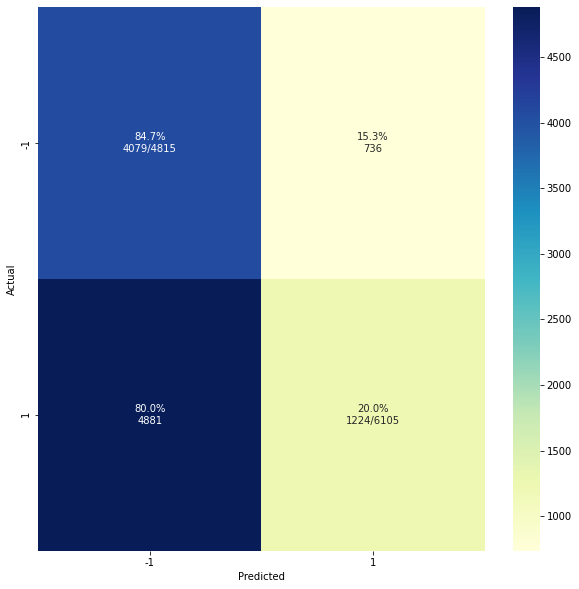

In [23]:
plot_cm(data_url_clean['Result'], data_url_clean['URL_Length'])

In [24]:
print(accuracy_score(data_url_clean['Result'],data_url_clean['URL_Length']))

0.4856227106227106


In [25]:
print(f1_score(data_url_clean['Result'],data_url_clean['URL_Length'], average='binary'))

0.3035337879727216


In [26]:
print(matthews_corrcoef(data_url_clean['Result'],data_url_clean['URL_Length']))

0.06162995711236682


Observas que essa métricas somente performa bem em acurácia, chutando um número grande sites como suspeitos

#Análise Coluna 3 - Shortining_Service

URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. For example, the URL “http://portal.hud.ac.uk/” can be shortened to “bit.ly/19DXSk4”. <br>
Rule:
- TinyURL → Phishing (-1)
- Otherwise → Legitimate (1)

In [27]:
count_Shortining_Service=data['Shortining_Service'].value_counts()

In [28]:
def plot_2(count):
  labels = ['Result']
  legitimate = count[1]
  phishing = count[-1]

  x = np.arange(len(labels))  # the label locations
  width = 0.1  # the width of the bars

  fig, ax = plt.subplots(figsize=(8,8))
  rects1 = ax.bar(x - width/2, legitimate, width, label='Legitimate', color='tab:blue')
  rects2 = ax.bar(x + width/2, phishing, width, label='Phising', color='tab:red')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Total')
  ax.set_title('Classes')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
  autolabel(rects1)
  autolabel(rects2)
  
  plt.show()

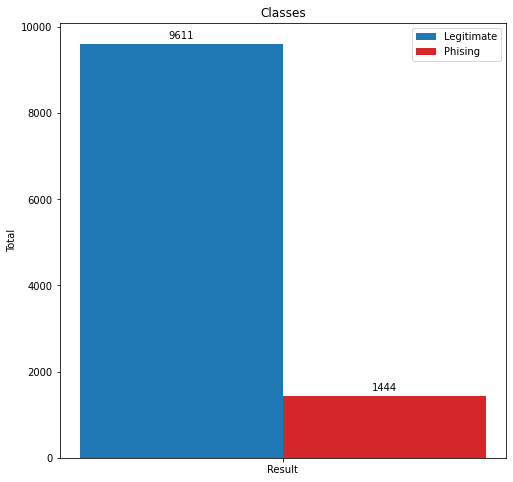

In [29]:
plot_2(count_Shortining_Service)

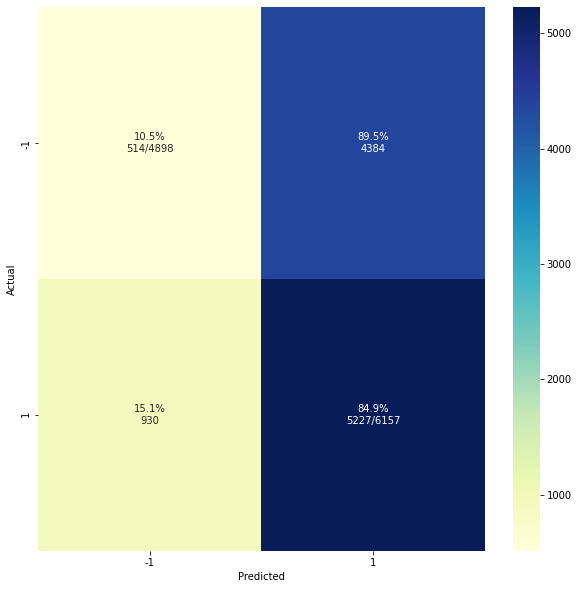

In [30]:
plot_cm(data['Result'], data['Shortining_Service'])

In [31]:
print(accuracy_score(data['Result'],data['Shortining_Service']))

0.5193125282677521


In [32]:
print(f1_score(data['Result'],data['Shortining_Service']))

0.66298833079655


In [33]:
print(matthews_corrcoef(data['Result'],data['Shortining_Service']))

-0.06796589265932153


Pouco discriminatório

# Coluna 4 - having_At_Symbol

Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.  <br>
Rule:
- Url Having @ Symbol → Phishing
- Otherwise → Legitimate

In [36]:
count_having_At_Symbol=data['having_At_Symbol'].value_counts()

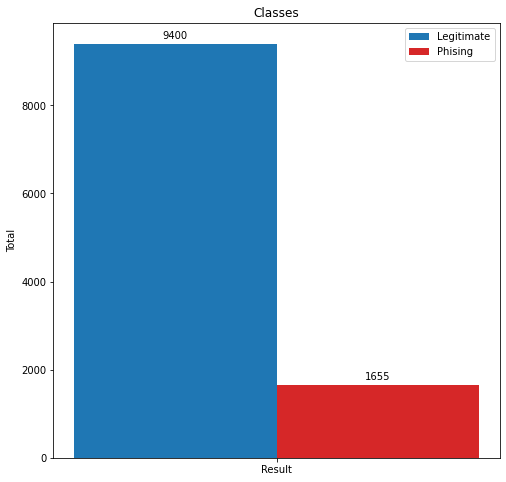

In [37]:
plot_2(count_having_At_Symbol)

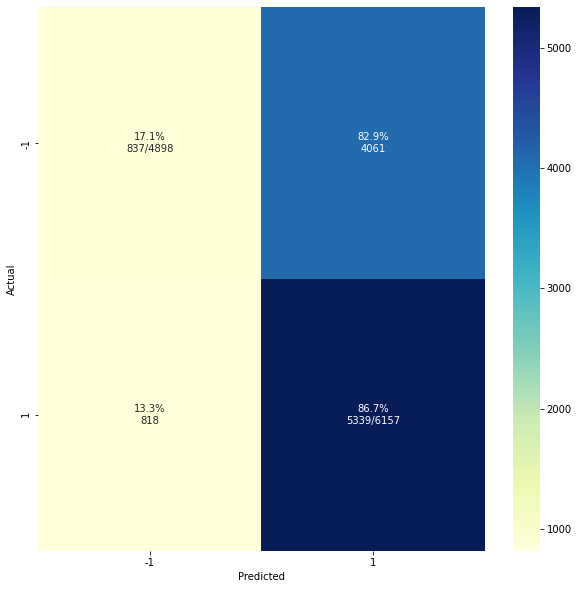

In [38]:
plot_cm(data['Result'], data['having_At_Symbol'])

In [46]:
def resultados(y_true, y_pred,):
  acc=accuracy_score(y_true,y_pred)
  f1=f1_score(y_true,y_pred)
  matt=matthews_corrcoef(y_true,y_pred)
  print('Acurácia: {}'.format(acc))
  print('F1-score: {}'.format(f1))
  print('Coeficiente de Matthews: {}'.format(matt))

In [47]:
resultados(data['Result'], data['having_At_Symbol'])

Acurácia: 0.5586612392582542
F1-score: 0.6863791219386772
Coeficiente de Matthews: 0.05294778935893241


Pouco discriminatório para os casos de Phishing

#Coluna 5 - double_slash_redirecting


The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examin the location where the “//” appears. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position. <br>
Rule:
- ThePosition of the Last Occurrence of ""//\" " in the URL > 7 → Phishing
- Otherwise → Legitimate

In [52]:
count_double_slash_redirecting=data['double_slash_redirecting'].value_counts()

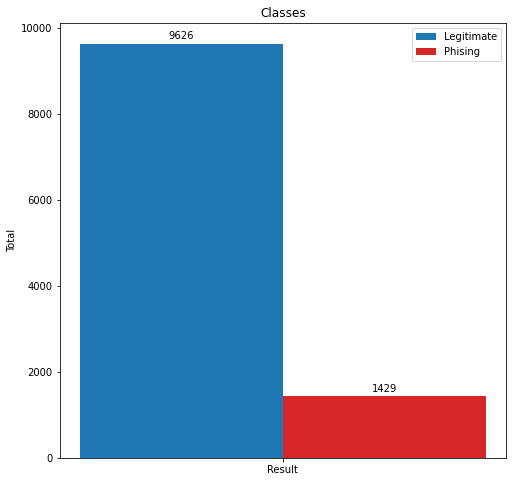

In [53]:
plot_2(count_double_slash_redirecting)

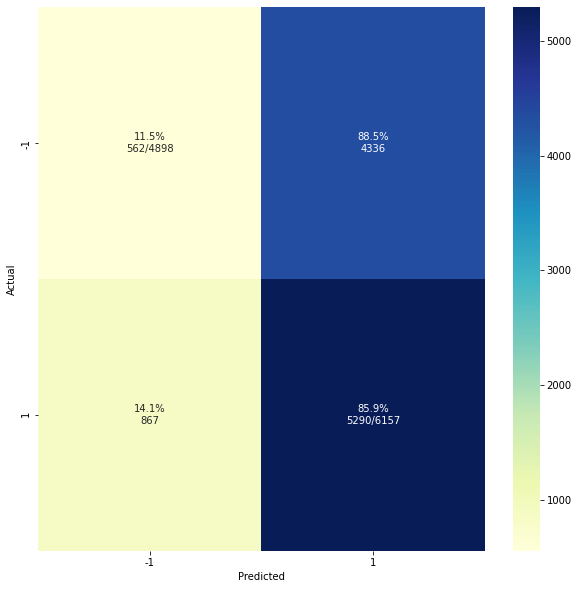

In [54]:
plot_cm(data['Result'], data['double_slash_redirecting'])

In [55]:
resultados(data['Result'], data['double_slash_redirecting'])

Acurácia: 0.5293532338308458
F1-score: 0.6703415066844073
Coeficiente de Matthews: -0.03860761195594813


#Coluna 6 - Prefix_Suffix

The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. For example http://www.Confirme-paypal.com/. <br>
Rule:
- Domain Name Part Includes (-) Symbol → Phishing
- Otherwise → Legitimate

In [57]:
count_Prefix_Suffix=data['Prefix_Suffix'].value_counts()

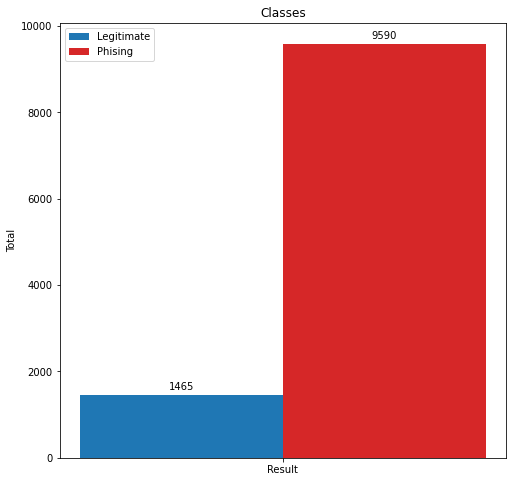

In [58]:
plot_2(count_Prefix_Suffix)

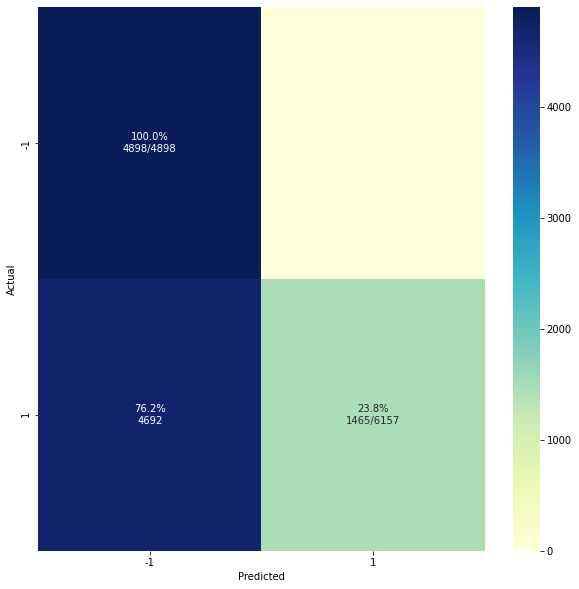

In [59]:
plot_cm(data['Result'], data['Prefix_Suffix'])

In [60]:
resultados(data['Result'], data['Prefix_Suffix'])

Acurácia: 0.5755766621438263
F1-score: 0.3844135397533456
Coeficiente de Matthews: 0.3486055703181554


Ele chuta vários como -1, entretanto todos os -1 foram encontrados não houve nenhum Falso Positivo

#Coluna 7 - having_Sub_Domain

Let us assume we have the following link: http://www.hud.ac.uk/students/. A domain name might include the country-code top-level domains (ccTLD), which in our example is “uk”. The “ac” part is shorthand for “academic”, the combined “ac.uk” is called a second-level domain (SLD) and “hud” is the actual name of the domain. To produce a rule for extracting this feature, we firstly have to omit the (www.) from the URL which is in fact a sub domain in itself. Then, we have to remove the (ccTLD) if it exists. Finally, we count the remaining dots. If the number of dots is greater than one, then the URL is classified as “Suspicious” since it has one sub domain. However, if the dots are greater than two, it is classified as “Phishing” since it will have multiple sub domains. Otherwise, if the URL has no sub domains, we will assign “Legitimate” to the feature.  <br>
Rule:
- Dots In Domain Part=1 → Legitimate
- Dots In Domain Part=2 → Suspicious 
- Otherwise→ Phishing

In [62]:
count_having_Sub_Domain = data['having_Sub_Domain'].value_counts()

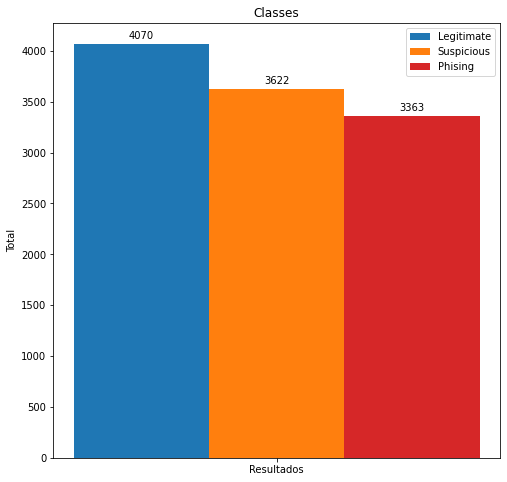

In [63]:
plot_3(count_having_Sub_Domain)

In [64]:
data_having_Sub_Domain_clean =data.query('having_Sub_Domain != 0')

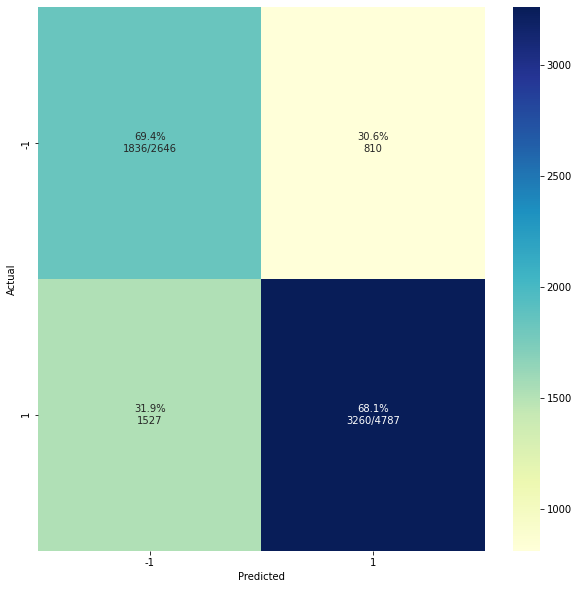

In [65]:
plot_cm(data_having_Sub_Domain_clean['Result'], data_having_Sub_Domain_clean['having_Sub_Domain'])

In [66]:
resultados(data_having_Sub_Domain_clean['Result'], data_having_Sub_Domain_clean['having_Sub_Domain'])

Acurácia: 0.6855912821202744
F1-score: 0.7361409054984758
Coeficiente de Matthews: 0.3606353177487008


Os resultados são interessantes, entretanto existem 3622 sites que não sofrem classificação

# Coluna 8 - SSLfinal_State

The existence of HTTPS is very important in giving the impression of website legitimacy, but this is clearly not enough. The authors in (Mohammad, Thabtah and McCluskey 2012) (Mohammad, Thabtah and McCluskey 2013) suggest checking the certificate assigned with HTTPS including the extent of the trust certificate issuer, and the certificate age. Certificate Authorities that are consistently listed among the top trustworthy names include: “GeoTrust, GoDaddy, Network Solutions, Thawte, Comodo, Doster and VeriSign”. Furthermore, by testing out our datasets, we find that the minimum age of a reputable certificate is two years. <br>
Rule:
- Use https and Issuer Is Trusted &and Age of Certificate≥ 1 Years → Legitimate
- Using https and Issuer Is Not Trusted  → Suspicious
- Otherwise→ Phishing

In [69]:
count_SSLfinal_State=data['SSLfinal_State'].value_counts()

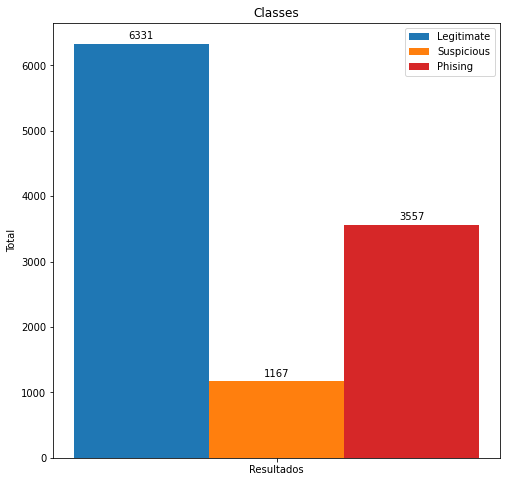

In [70]:
plot_3(count_SSLfinal_State)

In [71]:
data_SSLfinal_State_clean =data.query('SSLfinal_State != 0')

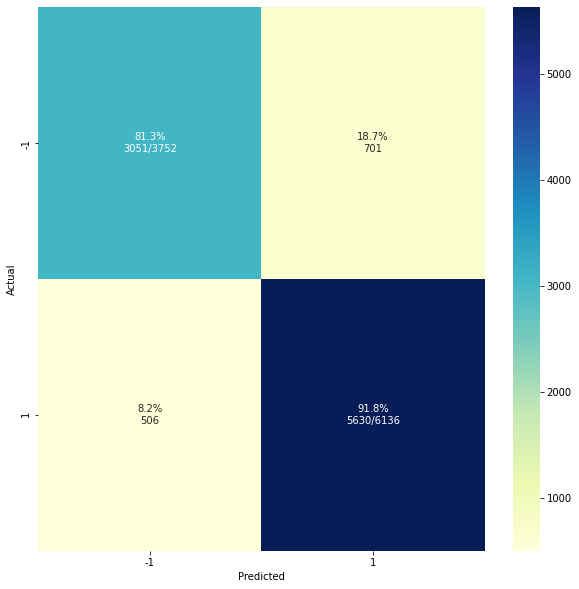

In [72]:
plot_cm(data_SSLfinal_State_clean['Result'], data_SSLfinal_State_clean['SSLfinal_State'])

In [73]:
resultados(data_SSLfinal_State_clean['Result'], data_SSLfinal_State_clean['SSLfinal_State'])

Acurácia: 0.8779328478964401
F1-score: 0.9031844068340419
Coeficiente de Matthews: 0.7388161755378647


Excelente atributo com apenas 1167 não classificados

#Coluna 9 - Domain_registeration_length

Based on the fact that a phishing website lives for a short period of time, we believe that trustworthy domains are regularly paid for several years in advance. In our dataset, we find that the longest fraudulent domains have been used for one year only. <br>
Rule:
- Domains Expires on≤ 1 years → Phishing 
- Otherwise→ Legitimate

In [75]:
count_Domain_registeration_length = data['Domain_registeration_length'].value_counts()

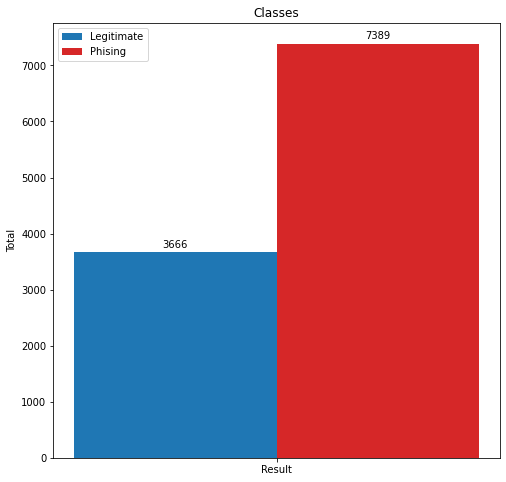

In [76]:
plot_2(count_Domain_registeration_length)

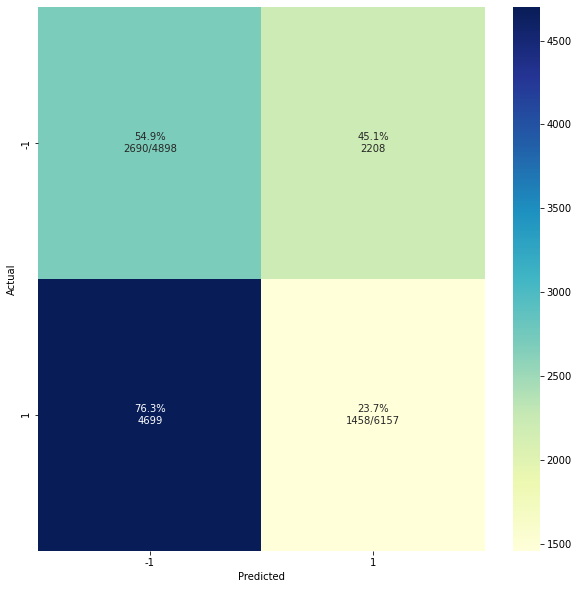

In [77]:
plot_cm(data['Result'], data['Domain_registeration_length'])

In [78]:
resultados(data['Result'], data['Domain_registeration_length'])

Acurácia: 0.37521483491632746
F1-score: 0.2968543214903797
Coeficiente de Matthews: -0.2257894624586099


#Coluna 10 - Favicon

A favicon is a graphic image (icon) associated with a specific webpage. Many existing user agents such as graphical browsers and newsreaders show favicon as a visual reminder of the website identity in the address bar. If the favicon is loaded from a domain other than that shown in the address bar, then the webpage is likely to be considered a Phishing attempt. <br>
Rule:
- Favicon Loaded From External Domain → Phishing
- Otherwise → Legitimate

In [81]:
count_Favicon = data['Favicon'].value_counts()

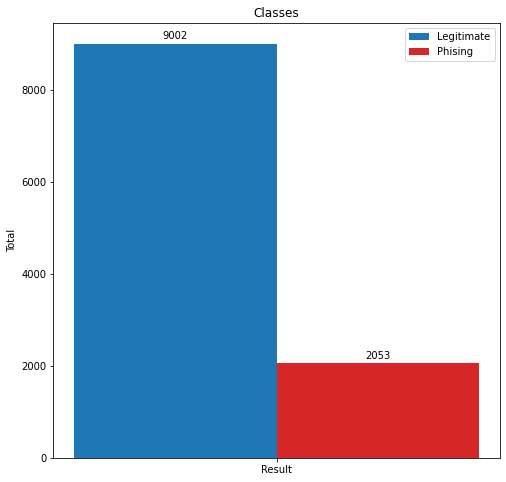

In [82]:
plot_2(count_Favicon)

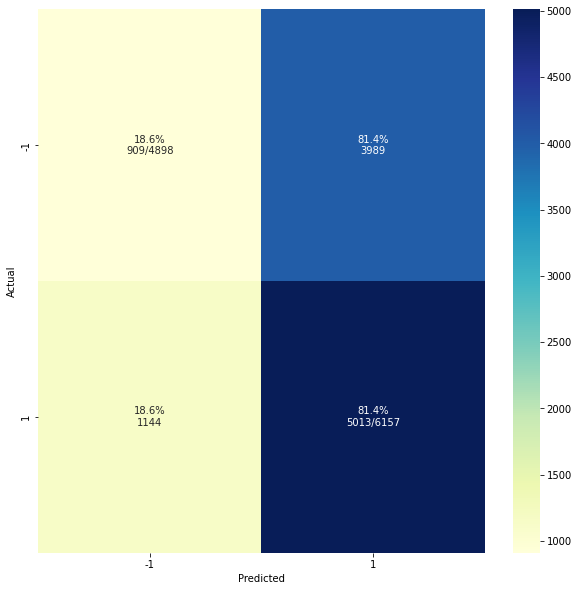

In [83]:
plot_cm(data['Result'], data['Favicon'])

In [84]:
resultados(data['Result'], data['Favicon'])

Acurácia: 0.5356852103120759
F1-score: 0.6613892736987926
Coeficiente de Matthews: -0.0002795246949452248


#Coluna 11 - port

This feature is useful in validating if a particular service (e.g. HTTP) is up or down on a specific server. In the aim of controlling intrusions, it is much better to merely open ports that you need. Several firewalls, Proxy and Network Address Translation (NAT) servers will, by default, block all or most of the ports and only open the ones selected. If all ports are open, phishers can run almost any service they want and as a result, user information is threatened. <br>
Rule:
- "Port # is of the " Preffered Status→ Phishing 
- Otherwise→ Legitimate

In [85]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [86]:
count_port = data['port'].value_counts()

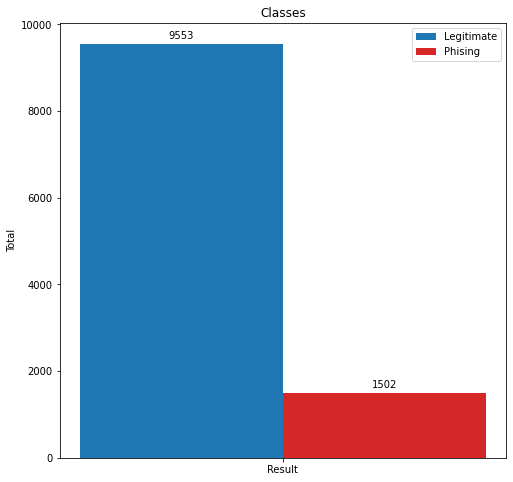

In [87]:
plot_2(count_port)

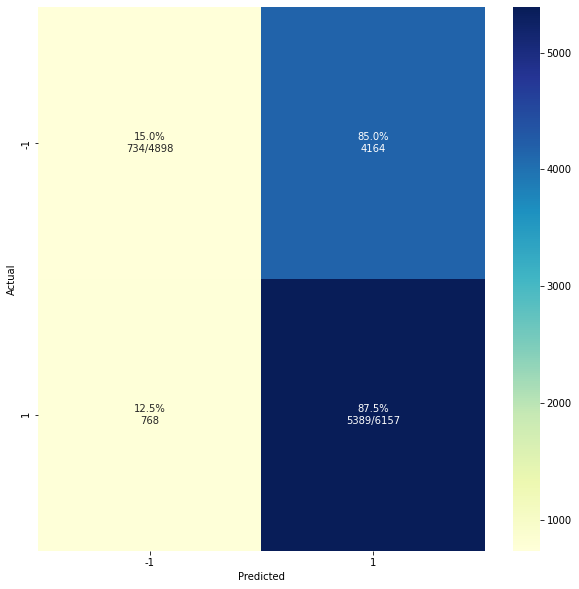

In [88]:
plot_cm(data['Result'],data['port'])

In [89]:
resultados(data['Result'],data['port'])

Acurácia: 0.5538670284938941
F1-score: 0.6860598345003183
Coeficiente de Matthews: 0.036418850913855244


# Coluna 12 - HTTPS_token



The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users. For example,
http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/. <br>
Rule:
- "Using " HTTP Token in Domain Part of The URL → Phishing 
- Otherwise → Legitimate


In [90]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [91]:
count_HTTPS_token = data['HTTPS_token'].value_counts()

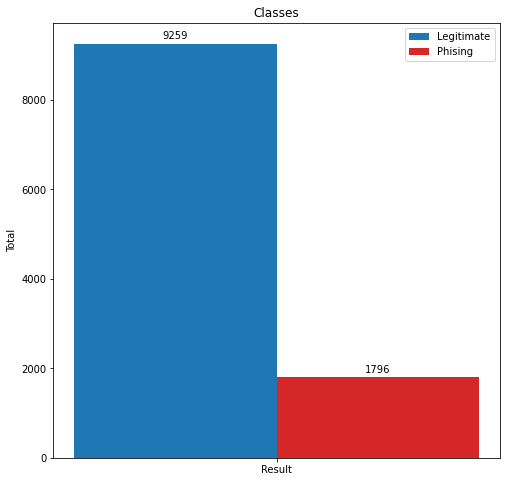

In [93]:
plot_2(count_HTTPS_token)

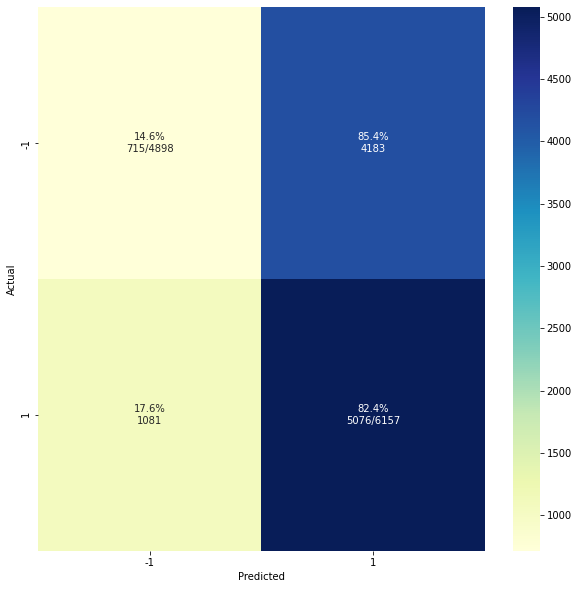

In [94]:
plot_cm(data['Result'], data['HTTPS_token'])

In [95]:
resultados(data['Result'], data['HTTPS_token'])

Acurácia: 0.523835368611488
F1-score: 0.6585365853658538
Coeficiente de Matthews: -0.03985389543680996


#Coluna 13 - Request_URL

Request URL examines whether the external objects contained within a webpage such as images, videos and sounds are loaded from another domain. In legitimate webpages, the webpage address and most of objects embedded within the webpage are sharing the same domain. <br>
Rule:
- % of Request URL <22% → Legitimate 
- % of Request URL≥22% and 61% → Suspicious 
- Otherwise → Phishing

In [103]:
count_Request_URL = data['Request_URL'].value_counts()

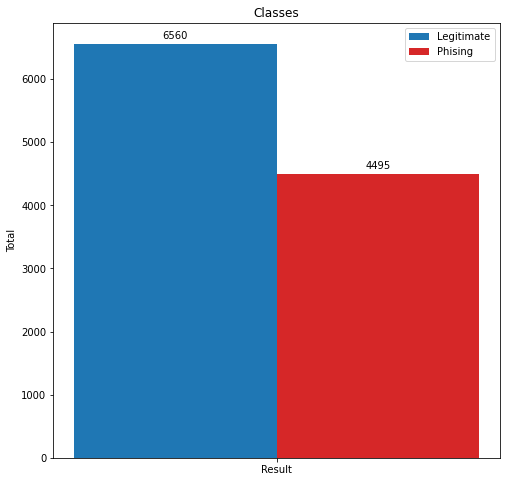

In [105]:
plot_2(count_Request_URL)

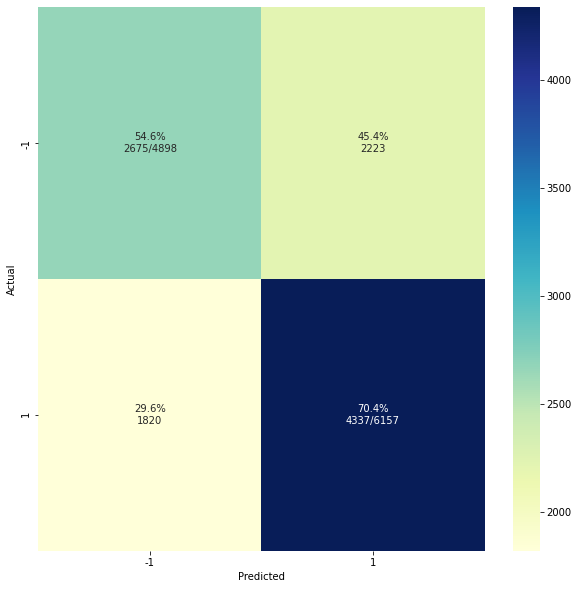

In [106]:
plot_cm(data['Result'], data['Request_URL'])

In [107]:
resultados(data['Result'], data['Request_URL'])

Acurácia: 0.6342831298055178
F1-score: 0.6820791067075568
Coeficiente de Matthews: 0.25337227167184156


#Coluna 14 - URL_of_Anchor

An anchor is an element defined by the \<a> tag. This feature is treated exactly as “Request URL”. <br>
Rule:
- % of URL Of Anchor <31%  → Legitimate 
- % of URL Of Anchor ≥31% And≤67% → Suspicious 
- Otherwise → Phishing

In [108]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [109]:
count_URL_of_Anchor = data['URL_of_Anchor'].value_counts()

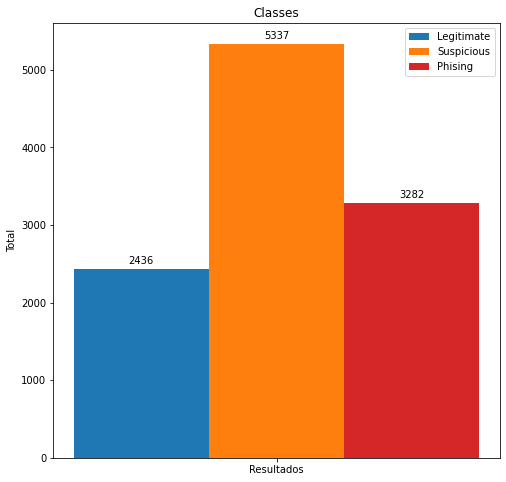

In [110]:
plot_3(count_URL_of_Anchor)

In [111]:
data_URL_of_Anchor_clean =data.query('URL_of_Anchor != 0')

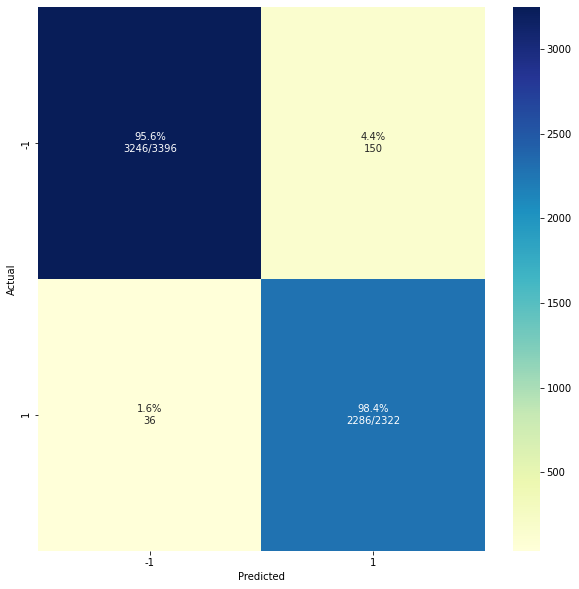

In [112]:
plot_cm(data_URL_of_Anchor_clean['Result'], data_URL_of_Anchor_clean['URL_of_Anchor'])

In [113]:
resultados(data_URL_of_Anchor_clean['Result'], data_URL_of_Anchor_clean['URL_of_Anchor'])

Acurácia: 0.9674711437565582
F1-score: 0.9609079445145019
Coeficiente de Matthews: 0.9338684416248719


# Coluna 15 - Links_in_tags

Given that our investigation covers all angles likely to be used in the webpage source code, we find that it is common for legitimate websites to use <Meta> tags to offer metadata about the HTML document; \<Script> tags to create a client side script; and <Link> tags to retrieve other web resources. It is expected that these tags are linked to the same domain of the webpage. <br>
Rule:
- % of Links in "\<Meta>","\<Script>" and "<"Link>\""<17%  → Legitimate
- % of Links in \<Meta>","\<Script>" and "<"Link>\"" ≥17% And≤81% → Suspicious - Otherwise→ Phishing

In [115]:
count_Links_in_tags = data['Links_in_tags'].value_counts()

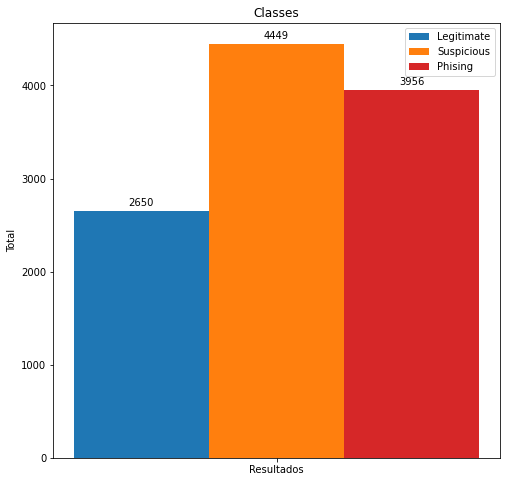

In [116]:
plot_3(count_Links_in_tags)

In [117]:
data_Links_in_tags_clean =data.query('Links_in_tags != 0')

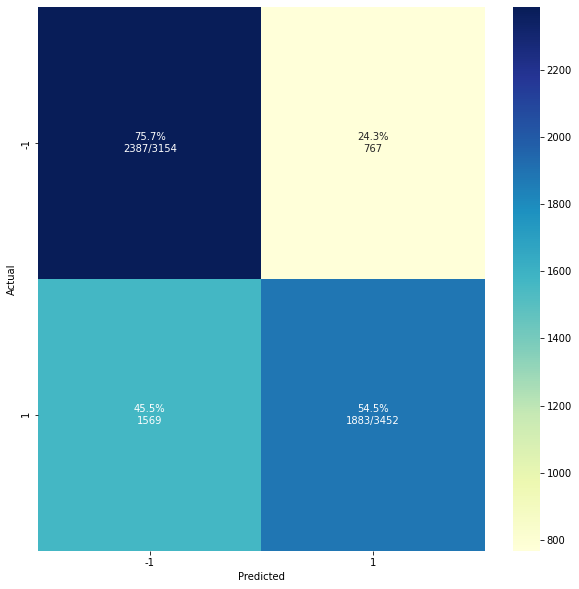

In [118]:
plot_cm(data_Links_in_tags_clean['Result'], data_Links_in_tags_clean['Links_in_tags'])

In [119]:
resultados(data_Links_in_tags_clean['Result'], data_Links_in_tags_clean['Links_in_tags'])

Acurácia: 0.6463820768997881
F1-score: 0.6171746968207146
Coeficiente de Matthews: 0.30807034109224873


#Couna 16 - SFH

SFHs that contain an empty string or “about:blank” are considered doubtful because an action should be taken upon the submitted information. In addition, if the domain name in SFHs is different from the domain name of the webpage, this reveals that the webpage is suspicious because the submitted information is rarely handled by external domains.  <br>
Rule:
- SFH is ""about: blank\"" Or Is Empty → Phishing
- SFH "Refers To " A Different Domain→ Suspicious
- Otherwise  → Legitimate

In [121]:
count_SFH = data['SFH'].value_counts()

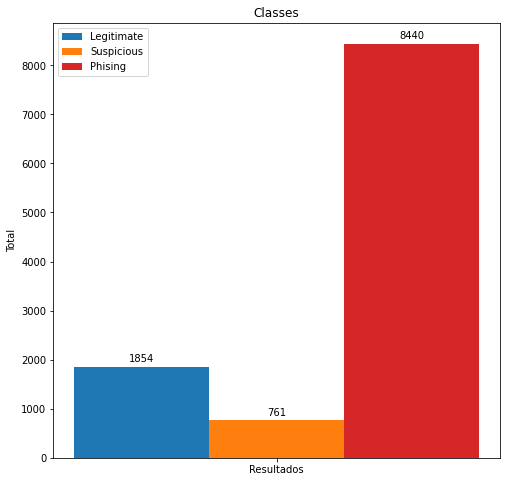

In [122]:
plot_3(count_SFH)

In [123]:
data_SFH_clean =data.query('SFH != 0')

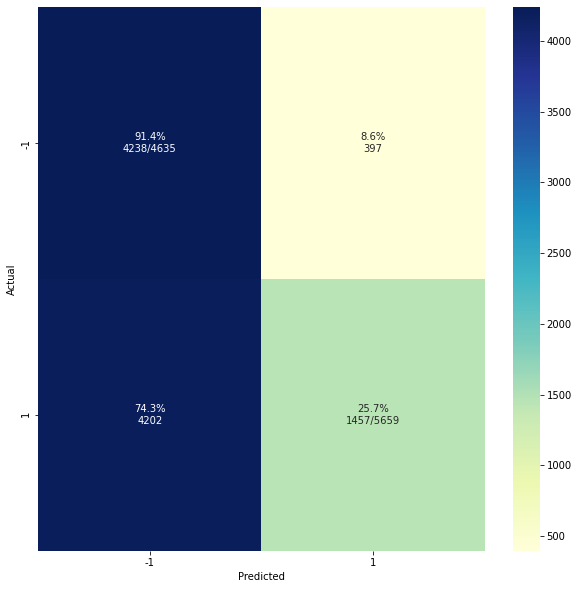

In [124]:
plot_cm(data_SFH_clean['Result'], data_SFH_clean['SFH'])

In [125]:
resultados(data_SFH_clean['Result'], data_SFH_clean['SFH'])

Acurácia: 0.5532348941130756
F1-score: 0.38786104086250495
Coeficiente de Matthews: 0.22244646553652198


#Coluna 17 - Submitting_to_email

Web form allows a user to submit his personal information that is directed to a server for processing. A phisher might redirect the user’s information to his personal email. To that end, a server-side script language might be used such as “mail()” function in PHP. One more client-side function that might be used for this purpose is the “mailto:” function. <br>
Rule: 
- Using ""mail()\" or \"mailto:\" Function to Submit User Information" → Phishing
- Otherwise  → Legitimate

In [126]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [127]:
count_Submitting_to_email = data['Submitting_to_email'].value_counts()

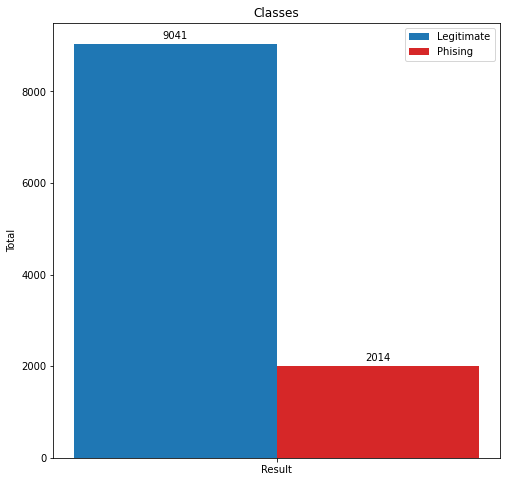

In [128]:
plot_2(count_Submitting_to_email)

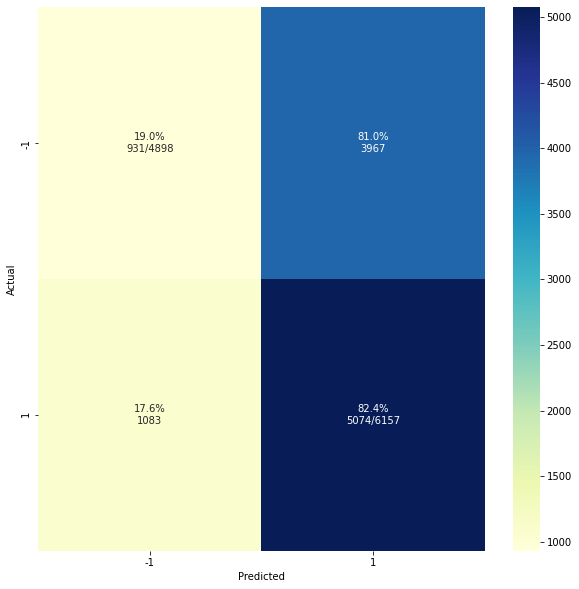

In [129]:
plot_cm(data['Result'],data['Submitting_to_email'])

In [130]:
resultados(data['Result'],data['Submitting_to_email'])

Acurácia: 0.5431931252826775
F1-score: 0.6677194367679957
Coeficiente de Matthews: 0.018249008647124577


# Coluna 18 - Abnormal_URL

This feature can be extracted from WHOIS database. For a legitimate website, identity is typically part of its URL. 

In [131]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [132]:
count_Abnormal_URL = data['Abnormal_URL'].value_counts()

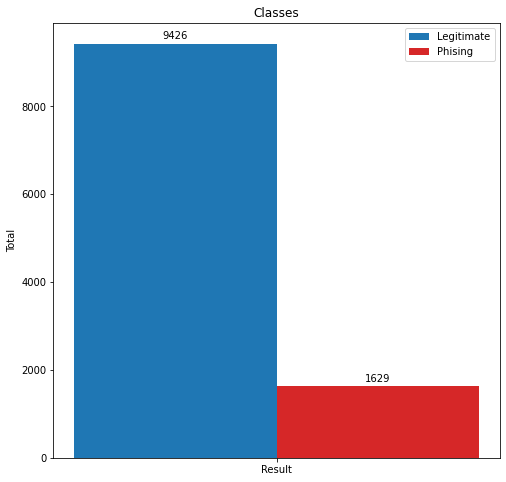

In [133]:
plot_2(count_Abnormal_URL)

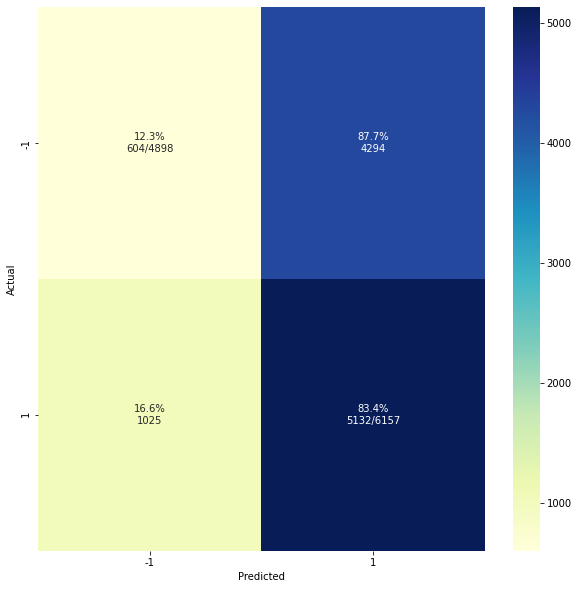

In [134]:
plot_cm(data['Result'], data['Abnormal_URL'])

In [135]:
resultados(data['Result'], data['Abnormal_URL'])

Acurácia: 0.5188602442333785
F1-score: 0.6586664955400116
Coeficiente de Matthews: -0.06048764182075715


#Coluna 19 - Redirect

The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times. <br>
- ofRedirect Page≤1 → Legitimate
- of Redirect Page≥2 &And<4 → Suspicious
- Otherwise → Phishing 


In [140]:
count_Redirect=data['Redirect'].value_counts()

In [156]:
b = pd.Series([0], index=[-1])
count_Redirect = count_Redirect.add(b, fill_value=0)

In [165]:
count_Redirect = count_Redirect.astype(int)

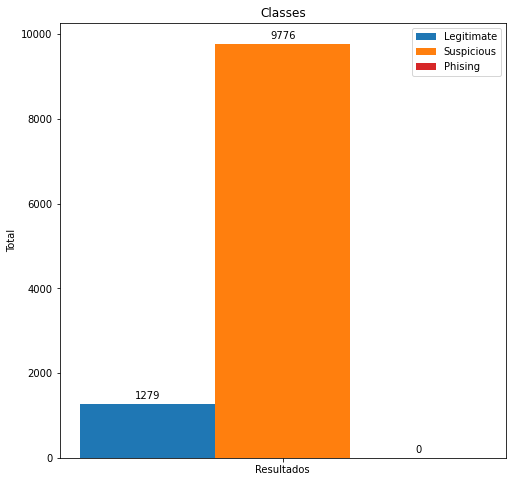

In [166]:
plot_3(count_Redirect)

In [167]:
data_Redirect_clean =data.query('Redirect != 0')

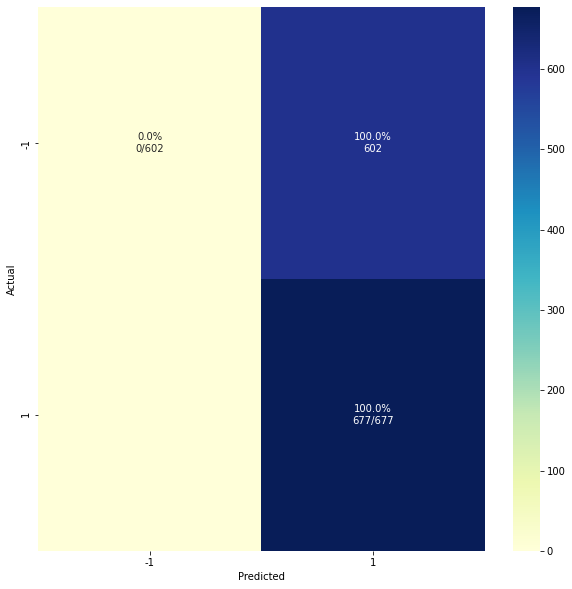

In [168]:
plot_cm(data_Redirect_clean['Result'], data_Redirect_clean['Redirect'])

In [169]:
resultados(data_Redirect_clean['Result'], data_Redirect_clean['Redirect'])

Acurácia: 0.5293197810789679
F1-score: 0.6922290388548058
Coeficiente de Matthews: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


#Coluna 20 - on_mouseover

Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar. <br>
Rule:
- onMouseOver Changes Status Bar → Phishing 
- It Does't Change Status Bar → Legitimate

In [172]:
count_on_mouseover = data['on_mouseover'].value_counts()

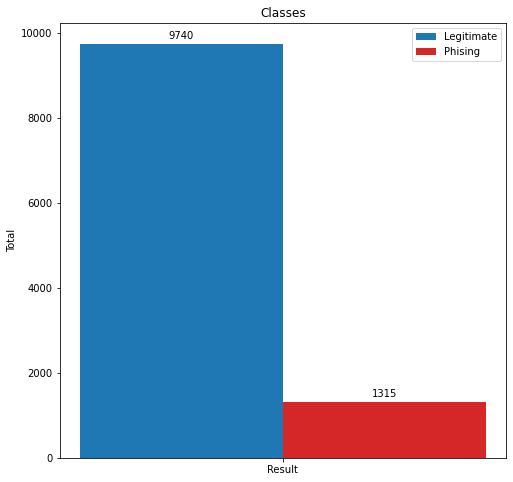

In [173]:
plot_2(count_on_mouseover)

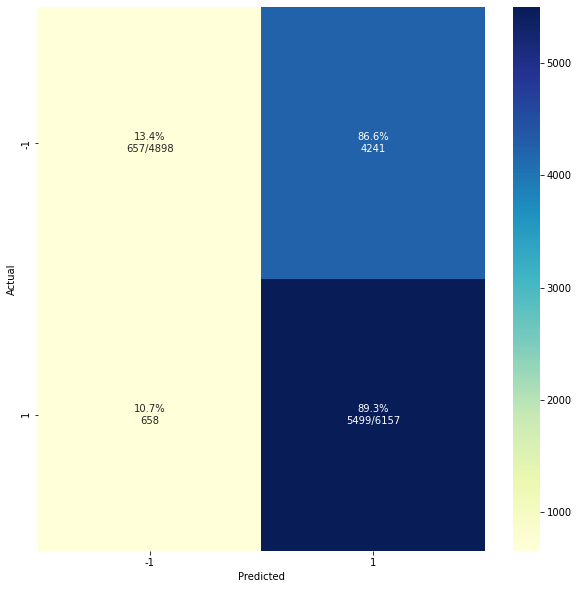

In [174]:
plot_cm(data['Result'],data['on_mouseover'])

In [175]:
resultados(data['Result'],data['on_mouseover'])

Acurácia: 0.5568521031207598
F1-score: 0.6918286469145123
Coeficiente de Matthews: 0.04183843997871965


#Coluna 21 - RightClick

Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled. <br>
Rule:
- Right Click Disabled → Phishing 
- Otherwise→Legitimate



In [177]:
count_RightClick = data['RightClick'].value_counts()

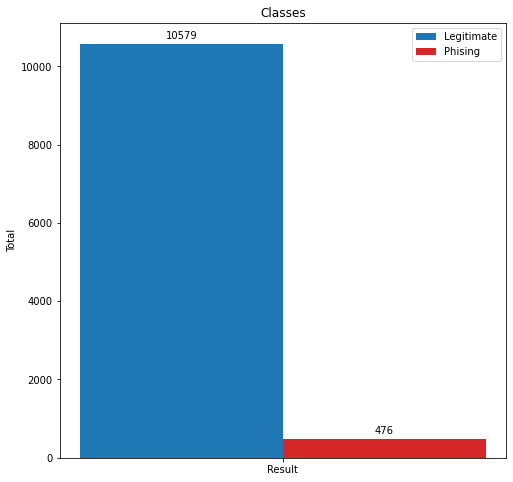

In [178]:
plot_2(count_RightClick)

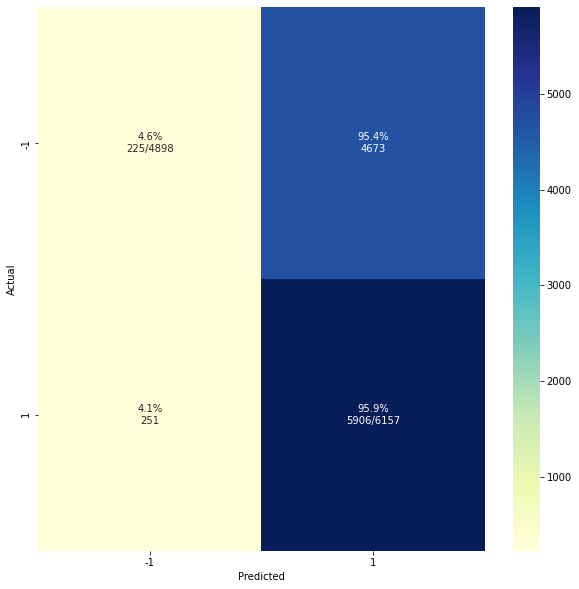

In [179]:
plot_cm(data['Result'],data['RightClick'])

In [180]:
resultados(data['Result'],data['RightClick'])

Acurácia: 0.5545906829488919
F1-score: 0.7057839388145314
Coeficiente de Matthews: 0.012653234917093019


#Coluna 22 - popUpWidnow

It is unusual to find a legitimate website asking users to submit their personal information through a pop-up window. On the other hand, this feature has been used in some legitimate websites and its main goal is to warn users about fraudulent activities or broadcast a welcome announcement, though no personal information was asked to be filled in through these pop-up windows. <br>
Rule: 
- Popoup Window Contains Text Fields → Phishing
- Otherwise → Legitimate

In [182]:
count_popUpWidnow = data['popUpWidnow'].value_counts()

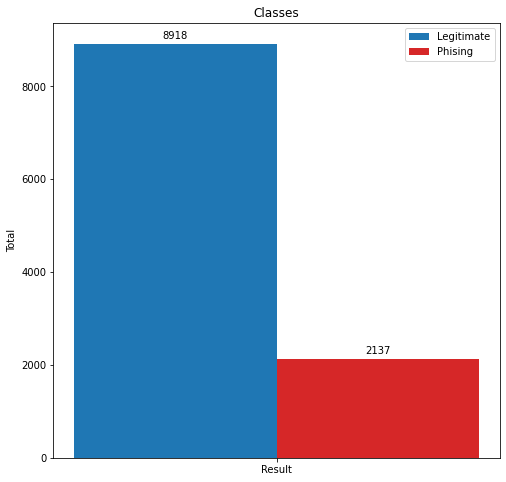

In [183]:
plot_2(count_popUpWidnow)

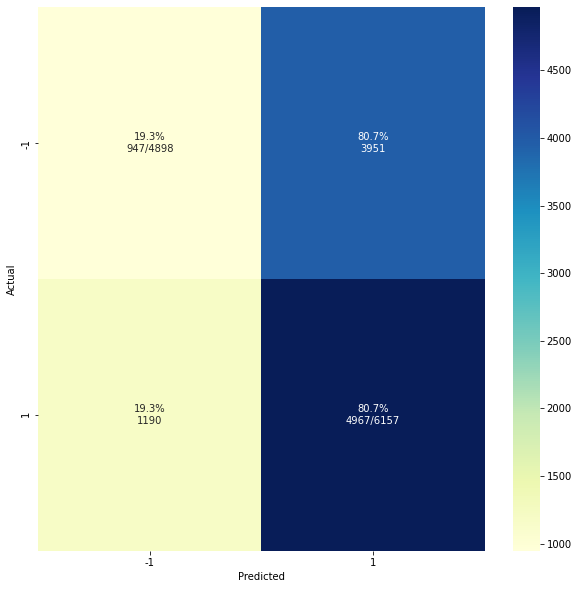

In [184]:
plot_cm(data['Result'], data['popUpWidnow'])

In [185]:
resultados(data['Result'], data['popUpWidnow'])

Acurácia: 0.5349615558570783
F1-score: 0.658971807628524
Coeficiente de Matthews: 8.588679256217028e-05


#Coluna 23 - Iframe

IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation. <br>
Rule:
- Using iframe → Phishing 
- Otherwise → Legitimate

In [187]:
count_Iframe = data['Iframe'].value_counts()

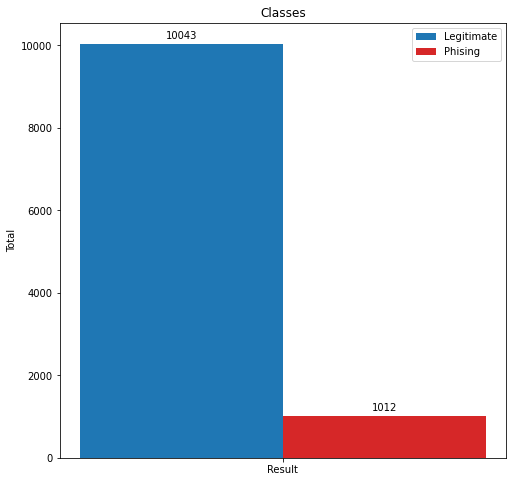

In [188]:
plot_2(count_Iframe)

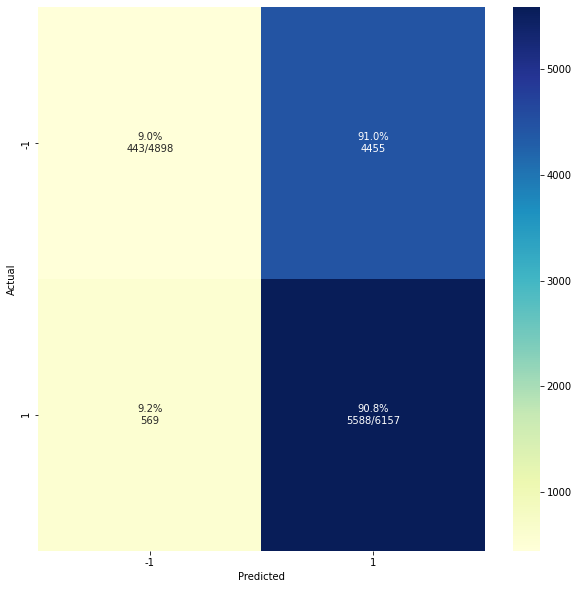

In [189]:
plot_cm(data['Result'], data['Iframe'])

In [190]:
resultados(data['Result'], data['Iframe'])

Acurácia: 0.5455450022614202
F1-score: 0.6898765432098766
Coeficiente de Matthews: -0.003393523864464377


#Coluna 24 - age_of_domain

This feature can be extracted from WHOIS database (Whois 2005). Most phishing websites live for a short period of time. By reviewing our dataset, we find that the minimum age of the legitimate domain is 6 months. <br>
Rule:
- Age Of Domain≥6 months → Legitimate
- Otherwise → Phishing

In [192]:
count_age_of_domain = data['age_of_domain'].value_counts()

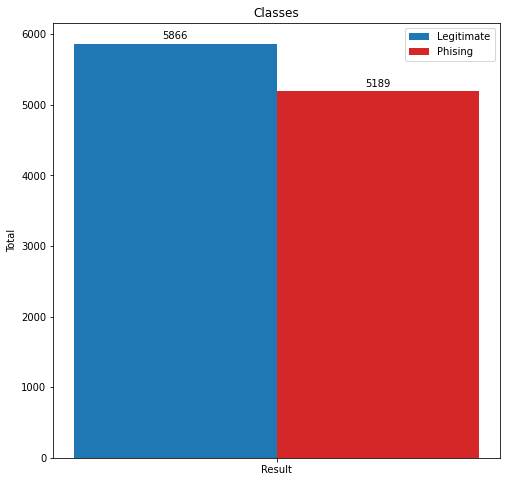

In [193]:
plot_2(count_age_of_domain)

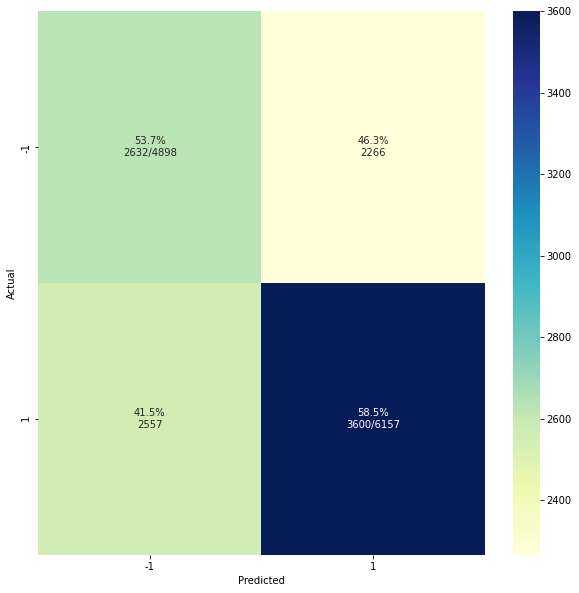

In [194]:
plot_cm(data['Result'], data['age_of_domain'])

In [195]:
resultados(data['Result'], data['age_of_domain'])

Acurácia: 0.5637268204432384
F1-score: 0.5988521999500956
Coeficiente de Matthews: 0.12149641654726293


#Coluna 25 - DNSRecord

For phishing websites, either the claimed identity is not recognized by the WHOIS database (Whois 2005) or no records founded for the hostname (Pan and Ding 2006). If the DNS record is empty or not found then the website is classified as “Phishing”, otherwise it is classified as “Legitimate”. <br>
Rule:
- no DNS Record For The Domain → Phishing 
- Otherwise→ Legitimate



In [197]:
count_DNSRecord = data['DNSRecord'].value_counts()

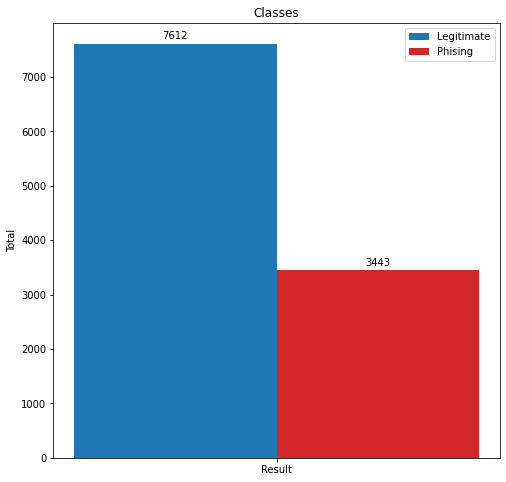

In [198]:
plot_2(count_DNSRecord)

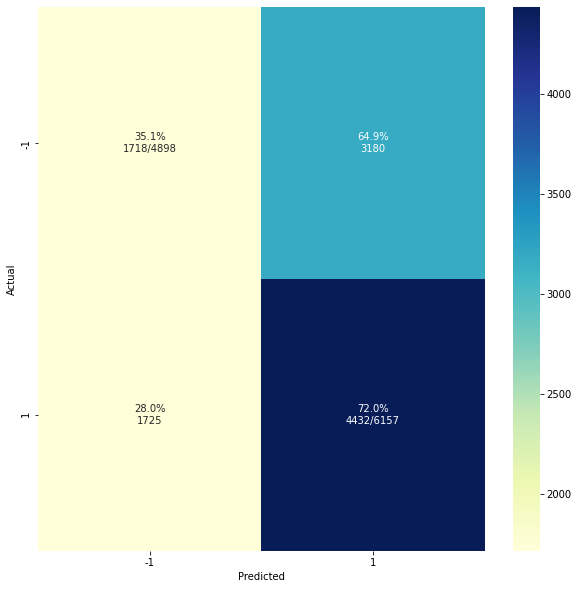

In [199]:
plot_cm(data['Result'], data['DNSRecord'])

In [200]:
resultados(data['Result'], data['DNSRecord'])

Acurácia: 0.5563093622795116
F1-score: 0.643764979301329
Coeficiente de Matthews: 0.07571774915972297


#Coluna 26 - web_traffic

This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”. Otherwise, it is classified as “Suspicious”. <br>
Rule:
- Website Rank<100,000 → Legitimate
- Website Rank>100,000 → Suspicious
- Otherwise → Phish

In [202]:
count_web_traffic = data['web_traffic'].value_counts()

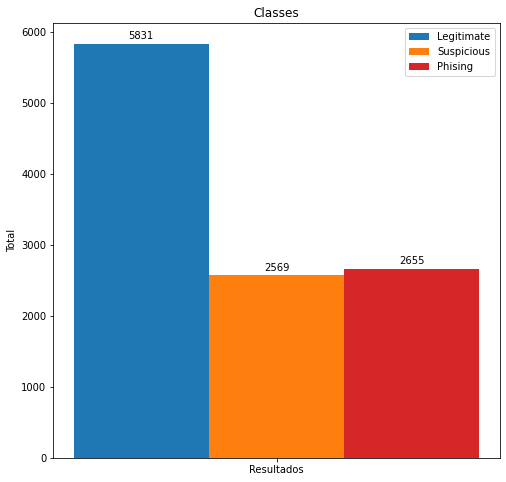

In [203]:
plot_3(count_web_traffic)

In [205]:
data_web_traffic_clean =data.query('web_traffic != 0')

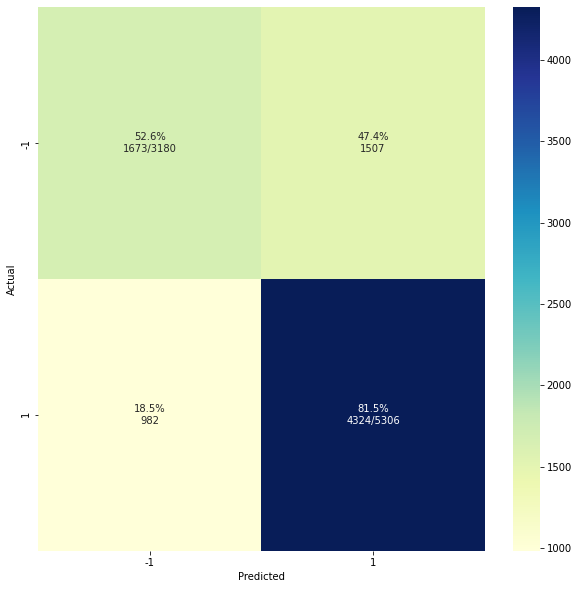

In [206]:
plot_cm(data_web_traffic_clean['Result'],data_web_traffic_clean['web_traffic'])

In [207]:
resultados(data_web_traffic_clean['Result'],data_web_traffic_clean['web_traffic'])

Acurácia: 0.7066933773273627
F1-score: 0.776510729999102
Coeficiente de Matthews: 0.3560265009363798


#Coluna 27 - Page_Rank

PageRank is a value ranging from “0” to “1”. PageRank aims to measure how important a webpage is on the Internet. The greater the PageRank value the more important the webpage. In our datasets, we find that about 95% of phishing webpages have no PageRank. Moreover, we find that the remaining 5% of phishing webpages may reach a PageRank value up to “0.2”. <br>
Rule:
- PageRank<0.2 → Phishing 
-Otherwise → Legitimate

In [209]:
count_Page_Rank = data['Page_Rank'].value_counts()

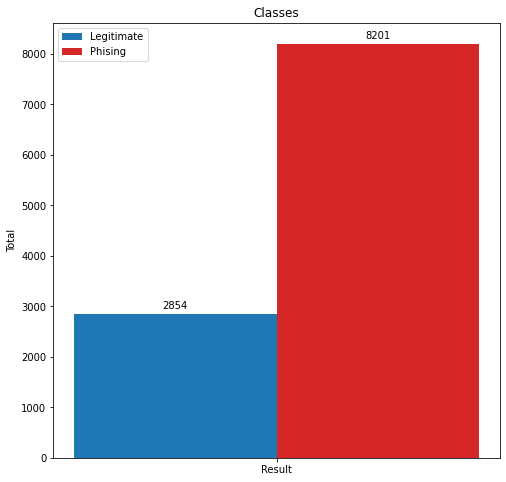

In [210]:
plot_2(count_Page_Rank)

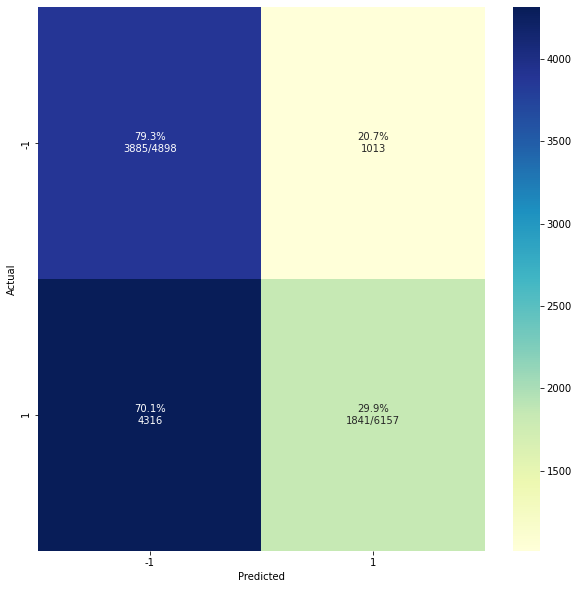

In [211]:
plot_cm(data['Result'],data['Page_Rank'])

In [213]:
resultados(data['Result'],data['Page_Rank'])

Acurácia: 0.5179556761646313
F1-score: 0.40861169681500387
Coeficiente de Matthews: 0.10464490513900696


#Coluna 28 - Google_Index

This feature examines whether a website is in Google’s index or not. When a site is indexed by Google, it is displayed on search results (Webmaster resources, 2014). Usually, phishing webpages are merely accessible for a short period and as a result, many phishing webpages may not be found on the Google index. <br>
Rule:
- Webpage Indexed by Google → Legitimate 
- Otherwise → Phishing

In [215]:
count_Google_Index = data['Google_Index'].value_counts()

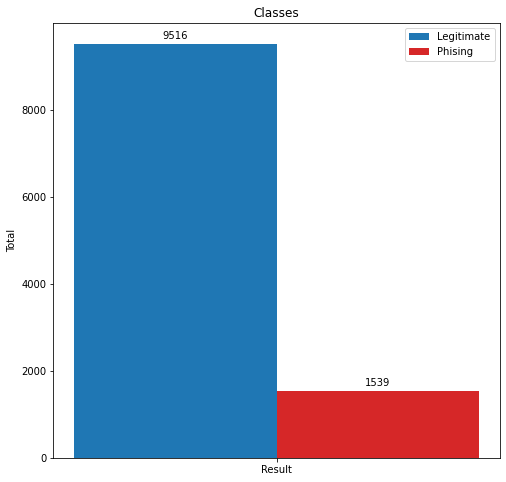

In [216]:
plot_2(count_Google_Index)

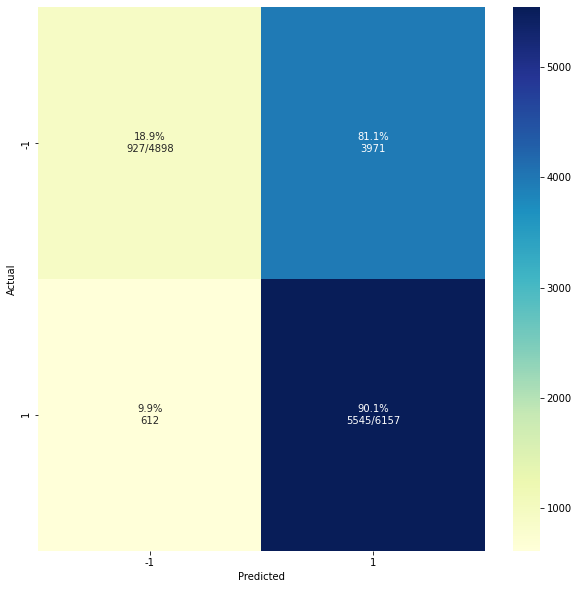

In [217]:
plot_cm(data['Result'], data['Google_Index'])

In [218]:
resultados(data['Result'], data['Google_Index'])

Acurácia: 0.5854364540931705
F1-score: 0.7075862949020609
Coeficiente de Matthews: 0.12895045164022328


#Coluna 29 - Links_pointing_to_page

The number of links pointing to the webpage indicates its legitimacy level, even if some links are of the same domain (Dean, 2014). In our datasets and due to its short life span, we find that 98% of phishing dataset items have no links pointing to them. On the other hand, legitimate websites have at least 2 external links pointing to them. <br>
Rule:
- Of Link Pointing to The Webpage=0 → Phishing 
- Of Link Pointing to The Webpage>0 and≤2→Suspicious 
- Otherwise → Legitimate

In [220]:
count_Links_pointing_to_page = data['Links_pointing_to_page'].value_counts()

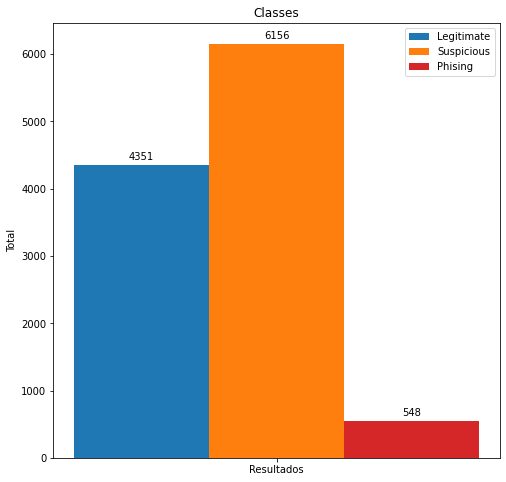

In [221]:
plot_3(count_Links_pointing_to_page)

In [222]:
data_Links_pointing_to_page_clean =data.query('Links_pointing_to_page != 0')

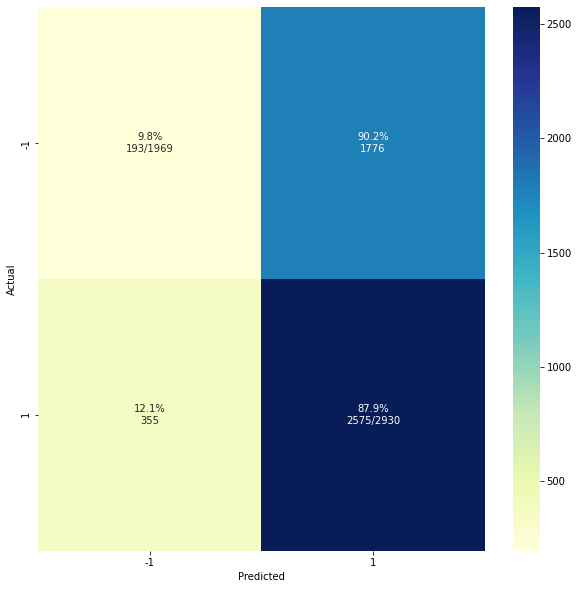

In [223]:
plot_cm(data_Links_pointing_to_page_clean['Result'], data_Links_pointing_to_page_clean['Links_pointing_to_page'])

In [224]:
resultados(data_Links_pointing_to_page_clean['Result'], data_Links_pointing_to_page_clean['Links_pointing_to_page'])

Acurácia: 0.5650132680138804
F1-score: 0.707320423018816
Coeficiente de Matthews: -0.03599614909414171


#Coluna 30 - Statistical_report

Several parties such as PhishTank (PhishTank Stats, 2010-2012), and StopBadware (StopBadware, 2010-2012) formulate numerous statistical reports on phishing websites at every given period of time; some are monthly and others are quarterly. In our research, we used 2 forms of the top ten statistics from PhishTank: “Top 10 Domains” and “Top 10 IPs” according to statistical-reports published in the last three years, starting in January2010 to November 2012. Whereas for “StopBadware”, we used “Top 50” IP addresses. <br>
Rule:
- Host Belongs to Top Phishing IPs or Top Phishing Domains → Phishing
- Otherwise → Legitimate

In [226]:
count_Statistical_report = data['Statistical_report'].value_counts()

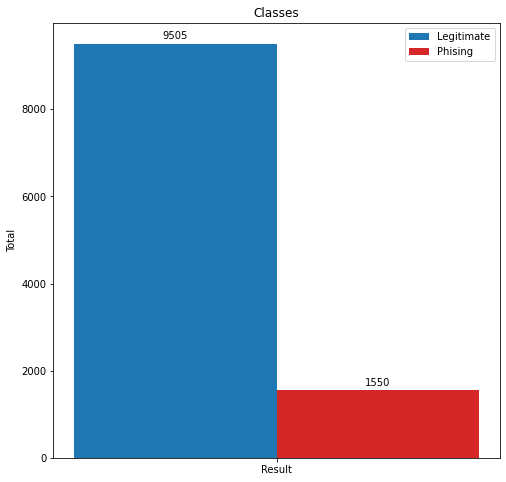

In [227]:
plot_2(count_Statistical_report)

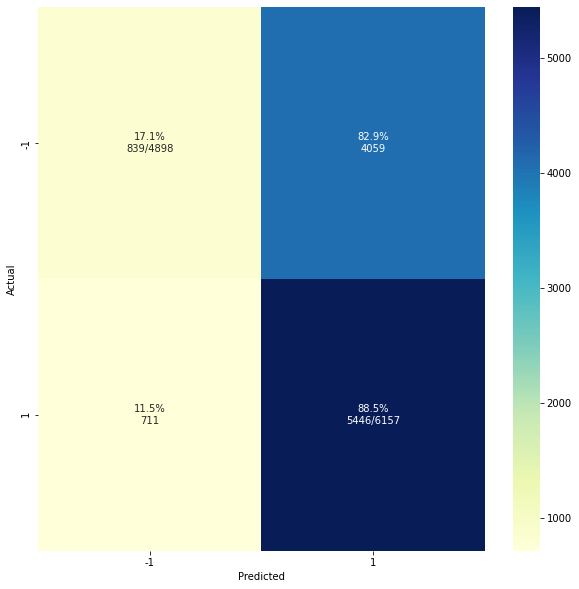

In [228]:
plot_cm(data['Result'], data['Statistical_report'])

In [229]:
resultados(data['Result'], data['Statistical_report'])

Acurácia: 0.5685210312075983
F1-score: 0.6954411952496488
Coeficiente de Matthews: 0.07985671779561745
